In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
class Bandit:
    
    def __init__(self, n_actions, n_steps, epsilon=0.01):
        self.n_actions = n_actions
        self.n_steps = n_steps
        self.epsilon = epsilon
        
        self.n_action_selected = np.zeros(n_actions)
        self.reward_estimates = np.zeros(n_actions)
        self.A = 0
        
    def select_action(self):
        rnd = np.random.uniform()
        if self.epsilon > rnd:
            A = np.random.choice(np.arange(self.n_actions))
        else:
            A = self.reward_estimates.argmax()
        
        self.n_action_selected[A] += 1
        self.A = A
        return A
        
    def update_reward_estimate(self, reward):
        N_a = self.n_action_selected[self.A]
        Q_a = self.reward_estimates[self.A]
        
        self.reward_estimates[self.A] = ((N_a-1)*Q_a + reward)/N_a
        
        
class Task:
    
    def __init__(self, n_actions, n_steps, **kwargs):
        self.n_actions = n_actions
        self.n_steps = n_steps
        self.rewards = np.random.normal(size=n_actions)
        epsilon = kwargs['epsilon']
        self.step = 0
        
        self.bandit = Bandit(n_actions, n_steps, epsilon)
        
        self.reward_tracker = np.zeros(n_steps)
        
    def make_step(self):
        A = self.bandit.select_action()
        reward = self.rewards[A] + np.random.normal()
        self.reward_tracker[self.step] = reward 
        self.bandit.update_reward_estimate(reward)
        
    def run_task(self):
        for _ in range(self.n_steps):
            self.make_step()
            self.step += 1
            
            
class Environment:
    
    def __init__(self, tasks, n_steps, n_runs):
        self.tasks = tasks
        self.n_tasks = len(tasks)
        self.n_steps = n_steps
        self.n_runs = n_runs
        
        self.task_rewards_tracker = np.zeros((n_steps, n_runs))
        
    def run_tasks(self):
        for i, tsk in enumerate(self.tasks):
            for j in range(n_runs):
                task = Task(n_actions, n_steps, epsilon=0.1)
                task.run_task()
                task_rewards[:, j] = task.reward_tracker

In [51]:
n_actions = 10
n_steps = 1000
n_runs = 2000

epsilons = [0, 0.01, 0.1]
eps_rewards = np.zeros((n_steps, len(epsilons)))
task_rewards = np.zeros((n_steps, n_runs))

for i, epsilon in enumerate(epsilons):
    for j in range(n_runs):
        task = Task(n_actions, n_steps, epsilon=epsilon)
        task.run_task()
        task_rewards[:, j] = task.reward_tracker
        
    eps_rewards[:, i] = task_rewards.mean(axis=1)

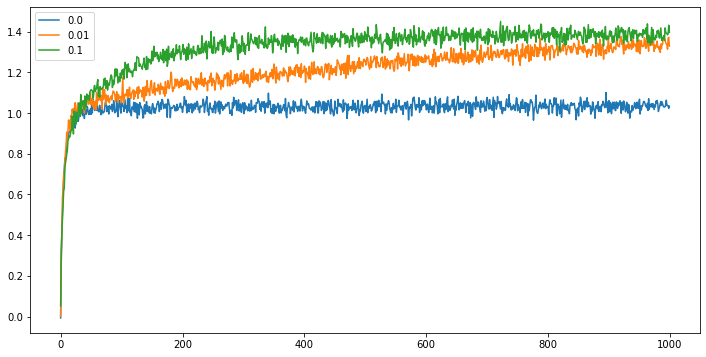

In [54]:
df = pd.DataFrame(eps_rewards, columns = epsilons)
df.plot(figsize=(12,6))